<a href="https://colab.research.google.com/github/macarov13/Analitica-de-negocios/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parcial 1**

Maria Antonia Caro

1. Modelo de clasificacion Naive Bayes

In [ ]:
#1.0. Carga librerias de trabajo
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [ ]:
#1.1. Se cargan los datos

nxl='/content/sample_data/4. BD_Parcial_L_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(10)

#Seleccionamos las variables de interes
XDB=XDB[['White','HS GPA','SAT', 'GPA', 'College Parent', 'Grad']]

#Datos de entrada - np.array()- convertir a numeros
XD=np.array(XDB[['White','HS GPA','SAT', 'GPA', 'College Parent']])

#Datos de salida - valor deseado - que quiero quue aprenda el modelo
yd=np.array(XDB['Grad'])
print(XDB)

total_datos = len(XDB)
print("En la base de datos hay", total_datos, "datos.")
print()

#Porcentaje SI
len(XD)
len(np.where(yd==1)[0])

len(np.where(yd==1)[0])/len(XD)
print("El porcentaje de las personas que SI van a lograr su grado en 4 años es de:", len(np.where(yd==1)[0])/len(XD))


#Porcentaje NO
len(XD)
len(np.where(yd==0)[0])

len(np.where(yd==0)[0])/len(XD)
print("El porcentaje de las personas que NO van a lograr su grado en 4 años es de:", len(np.where(yd==0)[0])/len(XD))

      White  HS GPA   SAT    GPA  College Parent  Grad
0         1    4.14  1410  2.949               1     1
1         1    3.30  1260  2.789               1     1
2         0    4.30   950  2.851               0     1
3         1    4.29  1290  3.533               1     1
4         1    4.20  1350  3.301               1     1
...     ...     ...   ...    ...             ...   ...
1995      1    3.18  1400  3.118               1     1
1996      0    3.82  1230  2.640               1     0
1997      0    3.74  1140  2.283               0     0
1998      1    3.75  1260  3.193               1     1
1999      0    3.08   950  2.090               0     0

[2000 rows x 6 columns]
En la base de datos hay 2000 datos.

El porcentaje de las personas que SI van a lograr su grado en 4 años es de: 0.692
El porcentaje de las personas que NO van a lograr su grado en 4 años es de: 0.308


In [ ]:
#1.2. Implementamos modelo Naive Bayes

mnb=GaussianNB()
mnb.fit(XD,yd)
ydp=mnb.predict(XD)

#Parametro de las medias de las variables para cada categoria
u=mnb.theta_ #Se estiman las medidas
sigma=np.sqrt(mnb.var_) #Se estiman las varianzas

#Las variaciones de las variables
LI=u-sigma
LS=u+sigma
print("La medida de las variables por categoria:")
print(u)
print("El limite inferior de la variacion de las variables por categoria es:")
print(LI)
print("El limite superior de la variacion de las variables por categora es:")
print(LS)
print("La varianza de las variables por categoria es:")
print(sigma)

#Metrica de evaluación
cm=confusion_matrix(yd,ydp)

XD = XDB.drop('Grad', axis=1)
yd = XDB['Grad']


La medida de las variables por categoria:
[[5.86038961e-01 3.70939935e+00 1.23485390e+03 2.43128247e+00
  6.98051948e-01]
 [7.21098266e-01 3.91479769e+00 1.28854769e+03 3.28720303e+00
  6.79913295e-01]]
El limite inferior de la variacion de las variables por categoria es:
[[9.34763992e-02 3.33244695e+00 1.08319860e+03 1.95529138e+00
  2.38926686e-01]
 [2.72616229e-01 3.62226610e+00 1.15210925e+03 2.96953734e+00
  2.13381638e-01]]
El limite superior de la variacion de las variables por categora es:
[[1.07860152e+00 4.08635175e+00 1.38650919e+03 2.90727356e+00
  1.15717721e+00]
 [1.16958030e+00 4.20732928e+00 1.42498613e+03 3.60486872e+00
  1.14644495e+00]]
La varianza de las variables por categoria es:
[[  0.49256256   0.3769524  151.65529771   0.47599109   0.45912526]
 [  0.44848204   0.29253159 136.43844258   0.31766569   0.46653166]]


In [ ]:
#1.3. Evaluacion del modelo

VN=cm[0,0] #Verdadero Negativo
FP=cm[0,1] #Falso Positivo
FN=cm[1,0] #Falso Negativo
VP=cm[1,1] #Verdadero Positivo

Exactitud=(VP+VN)/len(XD)
print("La exactitud del modelo es:", Exactitud) #Comportamiento general

Tasa_de_error=(FN+FP)/len(XD)
print("La tasa de error es:", Tasa_de_error) #Porcentaje de equivocación
Sensibilidad=VP/(VP+FN)
print("La sensibilidad es:", Sensibilidad) #Como se comporto frente a los positivos

Especificidad=VN/(VN+FN)
print("La especificidad es:", Especificidad) #Como se comporto frente a los negativos

Precisión=VP/(VP+FN)
print("La precisión es", Precisión) #Como le pego a los positivos

PredNeg=VN/(VN+FP)
print("La probabilidad de negativo es", PredNeg) #Como le pego a los negativos



La exactitud del modelo es: 0.867
La tasa de error es: 0.133
La sensibilidad es: 0.9263005780346821
La especificidad es: 0.8158844765342961
La precisión es 0.9263005780346821
La probabilidad de negativo es 0.7337662337662337


In [ ]:
#1.4. ¿Para una persona con las siguientes características
# ['White','HS GPA','SAT', 'GPA', 'College Parent']


Xun=np.array([[1,4,1260,1.9,1]]) #Esta la persona del excel
ydun=mnb.predict(Xun)
print("Individuo de pronostico 1:",ydun)

Xun=np.array([[1,2.91,1090,2.719,1]]) #Esta la persona del excel
ydun=mnb.predict(Xun)
print("Individuo de pronostico 2:",ydun)

Xun=np.array([[0,3.58,1210,3.319,1]]) #Esta la persona del excel
ydun=mnb.predict(Xun)
print("Individuo de pronostico 3:",ydun)

Individuo de pronostico 1: [0]
Individuo de pronostico 2: [0]
Individuo de pronostico 3: [1]


2. Arboles de desicion

In [ ]:
#2.0. Cargar librerias de referencia para el modelo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#2.1. Cargar datos

nxl='/content/sample_data/4. BD_Parcial_L_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

#Se procede con la selección de las variables
XD=np.array(XDB[['White','HS GPA','SAT','GPA','College Parent']]) #Datos entrada
print(XD)
yd=np.array(XDB[['Grad']]) #Dato que quiero que el modelo pronostique
print(yd)


[[1.000e+00 4.140e+00 1.410e+03 2.949e+00 1.000e+00]
 [1.000e+00 3.300e+00 1.260e+03 2.789e+00 1.000e+00]
 [0.000e+00 4.300e+00 9.500e+02 2.851e+00 0.000e+00]
 ...
 [0.000e+00 3.740e+00 1.140e+03 2.283e+00 0.000e+00]
 [1.000e+00 3.750e+00 1.260e+03 3.193e+00 1.000e+00]
 [0.000e+00 3.080e+00 9.500e+02 2.090e+00 0.000e+00]]
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]


In [ ]:
#2.2. Creacion del modelo - Decision tree

mar=DecisionTreeClassifier(criterion='gini', max_depth=4) #4 niveles o variables de entrada
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

#Evaluamos el modelo
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP) #Que porcentaje de los datos pronostico correctamente
print("La exactitud alcanzada por el modelo es:", Ex)

Se=VP/(VP+FN) #Que porcentaje de los datos positivos pronosticados correctamente
print("La sensibilidad alcanzada por el modelo es:", Se)

Es=VN/(VN+FP) #Que porcentaje de los datos negativos pronosticados correctamente
print("La especificidad alcanzada por el modelo es:", Es)

[[ 422  194]
 [   2 1382]]
La exactitud alcanzada por el modelo es: 0.902
La sensibilidad alcanzada por el modelo es: 0.9985549132947977
La especificidad alcanzada por el modelo es: 0.685064935064935


In [ ]:
#2.3. Arbol

#Librerias para graficar el árbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=['White','HS GPA','SAT','GPA','College Parent'] #Titulos para los nodos
dot_graph=export_graphviz(mar, feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

In [ ]:
#2.4. Se procede con el pronostico de los nuevos solicitantes

XDB2=pd.read_excel(nxl,sheet_name=1)
XDB2=XDB2.dropna() #Elimina celdas vacias
XDB2.head(100)

XD2=np.array(XDB2[['White','HS GPA','SAT','GPA','College Parent']]) #Datos entrada
print(XD2)

#Pronosticamos la aprobacion
ydp2=mar.predict(XD2)
print(ydp2)


[[1.000e+00 4.000e+00 1.260e+03 1.900e+00 1.000e+00]
 [1.000e+00 2.910e+00 1.090e+03 2.719e+00 1.000e+00]
 [0.000e+00 3.580e+00 1.210e+03 3.319e+00 1.000e+00]]
[0 1 1]


3. Modelo KMeans

In [ ]:
#3.0. Cargar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Prestamo interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

<Figure size 1000x1000 with 0 Axes>

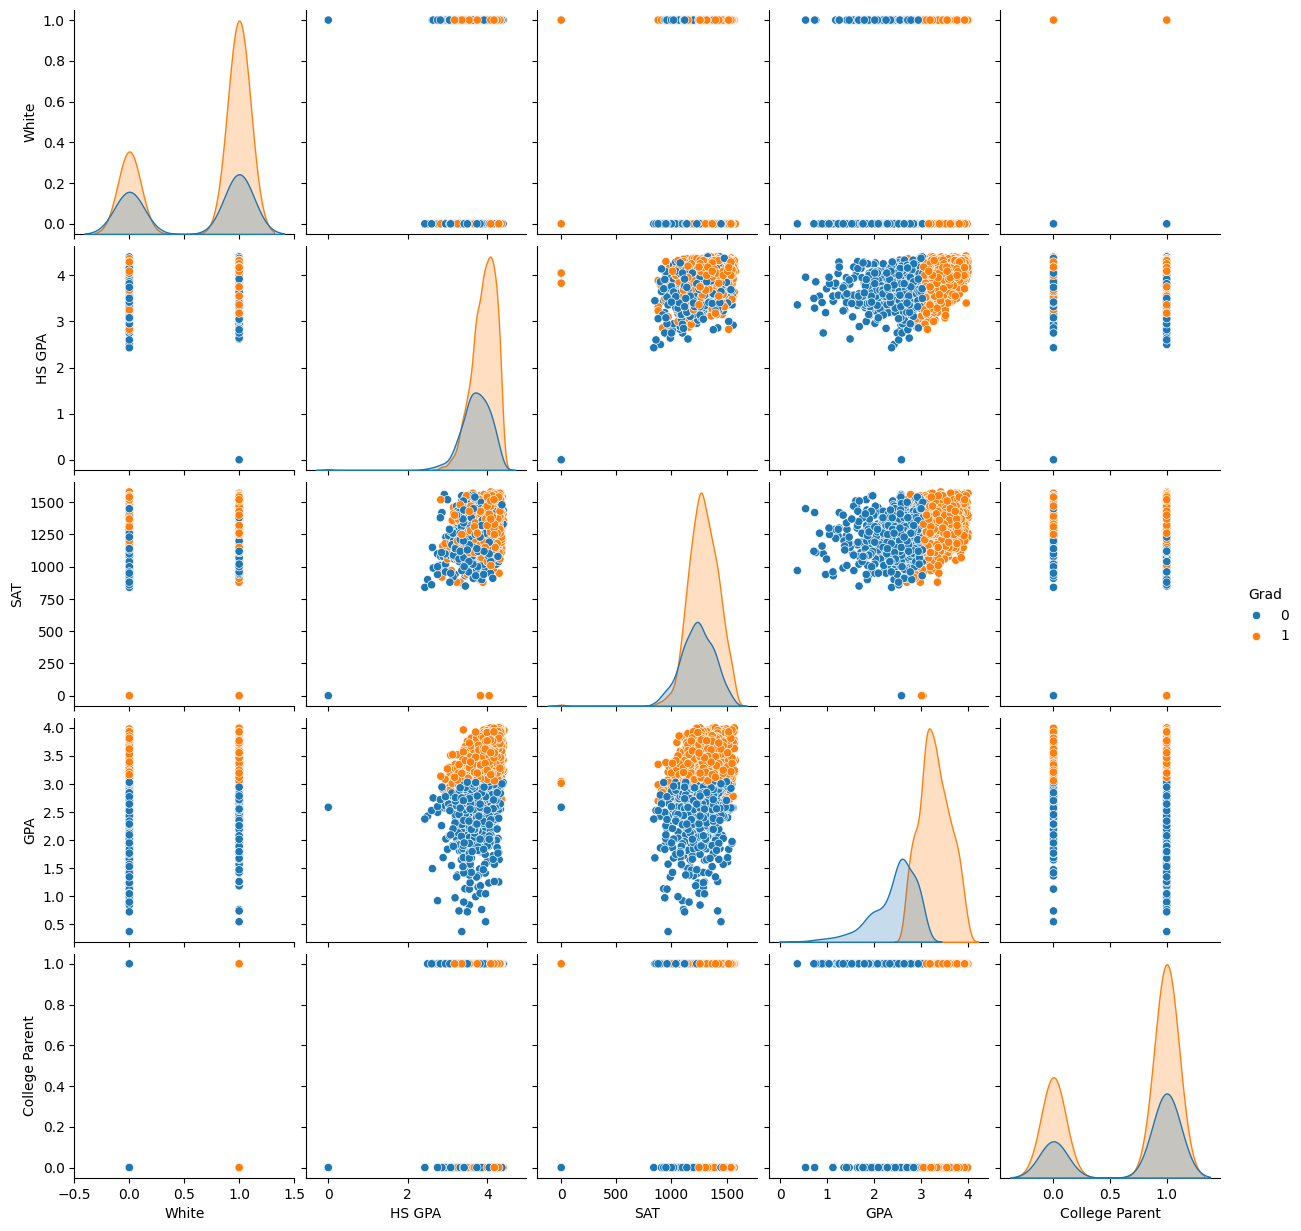

,White,HS GPA,SAT,GPA,College Parent,Grad
White,1.000000,0.130981,0.191930,0.194132,-0.005987,0.133612
HS GPA,0.130981,1.000000,0.346767,0.376932,0.020068,0.283404
SAT,0.191930,0.346767,1.000000,0.260927,-0.029768,0.172794
GPA,0.194132,0.376932,0.260927,1.000000,-0.015137,0.726624
College Parent,-0.005987,0.020068,-0.029768,-0.015137,1.000000,-0.018035
Grad,0.133612,0.283404,0.172794,0.726624,-0.018035,1.000000


In [ ]:
#3.1. Cargar archivos

nxl="/content/sample_data/4. BD_Parcial_L_int.xlsx"
XDB= pd.read_excel(nxl, sheet_name=0)                          # X data base
XDB=XDB.dropna()
XDB.head(5)

#1. Se seleccionan las variables de interes
XDB=XDB[['White','HS GPA','SAT','GPA','College Parent','Grad']]

#2. Determinar la correlacion entre las variables y su impacto sobre la variable de salida

plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue="Grad")
plt.show()

#3. La correlación numérica es
XDB.corr()

La matriz de confusion es:
: [[ 386  230]
 [  69 1315]]
La exactitud es: 0.8505
La sensibilidad es: 0.9501445086705202
La especificidad es: 0.6266233766233766
Se graduara en los proximos 4 años o no: [0]


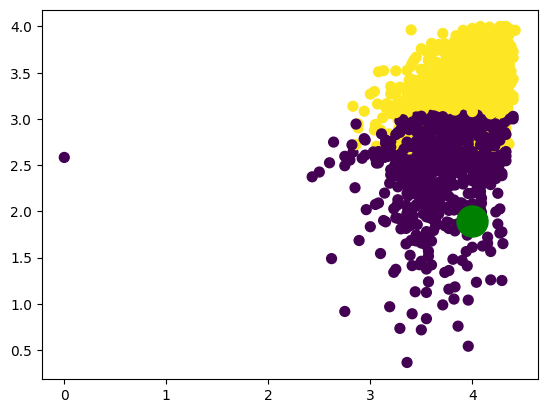

Se graduara en los proximos 4 años o no: [0]


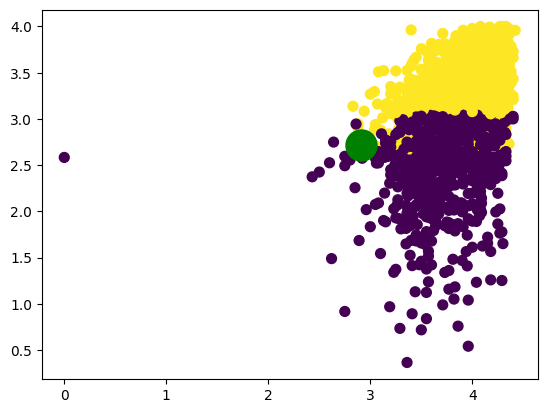

Se graduara en los proximos 4 años o no: [1]


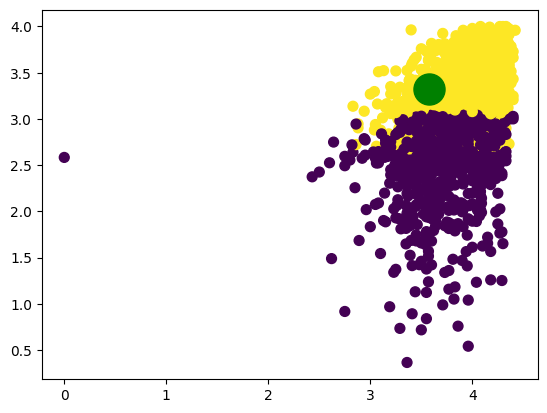

In [ ]:
#3.2. Construimos el modelo KNN
XD=np.array(XDB[['White','HS GPA','SAT','GPA','College Parent']])   #Variables de entrada
Yd=np.array(XDB["Grad"])                   #Variable de salida

Knn = KNeighborsClassifier(n_neighbors=10)   #Evalua 10 vecinos
Knn.fit(XD,Yd)

ydp=Knn.predict(XD)

#2. Evaluamos el modelo KNN
cm=confusion_matrix(Yd,ydp)
print("La matriz de confusion es:\n:",cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud = (VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad = VP/(VP+FN)
Sensibilidad
Especificidad = VN/(VN+FP)
Especificidad

print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)     #Negativo

#3. Evaluamos 1 posible
XDp=np.array([[1, 4, 1260, 1.9, 1]])
ydpp=Knn.predict(XDp)
print("Se graduara en los proximos 4 años o no:",ydpp)
plt.figure()

plt.scatter(XD[:,1],XD[:,3],c=Yd,s=50,cmap="viridis")      #Grafico de correlacion
plt.scatter(XDp[:,1],XDp[:,3],marker="o", s=500, facecolors="green")
plt.show()

#Evaluamos 2do posible
XDp=np.array([[1, 2.91, 1090, 2.719, 1]])
ydpp=Knn.predict(XDp)
print("Se graduara en los proximos 4 años o no:",ydpp)
plt.figure()

plt.scatter(XD[:,1],XD[:,3],c=Yd,s=50,cmap="viridis")      #Grafico de correlacion
plt.scatter(XDp[:,1],XDp[:,3],marker="o", s=500, facecolors="green")
plt.show()

#Evaluamos 3er posible
XDp=np.array([[0, 3.58, 1210, 3.319, 1]])
ydpp=Knn.predict(XDp)
print("Se graduara en los proximos 4 años o no:",ydpp)
plt.figure()

plt.scatter(XD[:,1],XD[:,3],c=Yd,s=50,cmap="viridis")      #Grafico de correlacion
plt.scatter(XDp[:,1],XDp[:,3],marker="o", s=500, facecolors="green")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


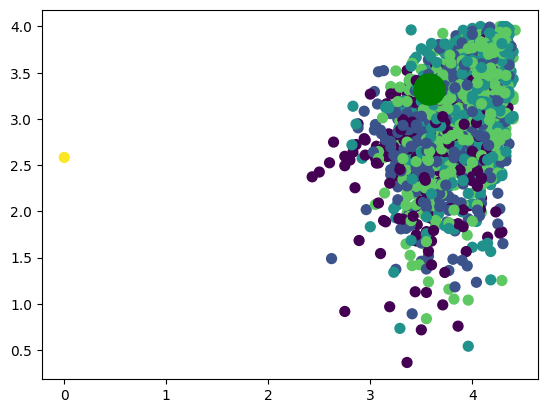

El numero de negados para el cluster 1 es: 138
El numero de aprobados para el cluster 1 es: 131
El porcentaje de aprobados para el cluster 1 es: 0.48698884758364314
El porcentaje de negados para el cluster 1 es: 0.5130111524163569


El numero de negados para el cluster 2 es: 183
El numero de aprobados para el cluster 2 es: 371
El porcentaje de aprobados para el cluster 2 es: 0.6696750902527075
El porcentaje de negados para el cluster 2 es: 0.3303249097472924


El numero de negados para el cluster 3 es: 118
El numero de aprobados para el cluster 3 es: 370
El porcentaje de aprobados para el cluster 3 es: 0.7581967213114754
El porcentaje de negados para el cluster 3 es: 0.24180327868852458


El numero de negados para el cluster 4 es: 176
El numero de aprobados para el cluster 4 es: 510
El porcentaje de aprobados para el cluster 4 es: 0.7434402332361516
El porcentaje de negados para el cluster 4 es: 0.2565597667638484


El numero de negados para el cluster 5 es: 1
El numero de aprobados pa

In [ ]:
#3.3. Construccion del KMeans

np.random.seed(42) #Para que a todos nos de el mismo modelo

mkn=KMeans(n_clusters=5, init='random', random_state=42)
mkn.fit(XD, Yd)

ydp2=mkn.predict(XD)

plt.scatter(XD[:,1], XD[:,3], c=labels, s=50, cmap='viridis')
plt.scatter(XDp[:,1], XDp[:,3], marker='o', s=500, facecolors='green')
plt.show()


#Cual es el porcentaje de preaprobados y negados del cluster 1
c20=len(np.where((labels==0) & (Yd==0))[0])
print("El numero de negados para el cluster 1 es:", c20)
c21=len(np.where((labels==0) & (Yd==1))[0])
print("El numero de aprobados para el cluster 1 es:",c21)
print("El porcentaje de aprobados para el cluster 1 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 1 es:", c20/(c20+c21))
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 2?
c20=len(np.where((labels==1) & (Yd==0))[0])
print("El numero de negados para el cluster 2 es:", c20)
c21=len(np.where((labels==1) & (Yd==1))[0])
print("El numero de aprobados para el cluster 2 es:",c21)
print("El porcentaje de aprobados para el cluster 2 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 2 es:", c20/(c20+c21))
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 3
c20=len(np.where((labels==2) & (Yd==0))[0])
print("El numero de negados para el cluster 3 es:", c20)
c21=len(np.where((labels==2) & (Yd==1))[0])
print("El numero de aprobados para el cluster 3 es:",c21)
print("El porcentaje de aprobados para el cluster 3 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 3 es:", c20/(c20+c21))
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 4
c20=len(np.where((labels==3) & (Yd==0))[0])
print("El numero de negados para el cluster 4 es:", c20)
c21=len(np.where((labels==3) & (Yd==1))[0])
print("El numero de aprobados para el cluster 4 es:",c21)
print("El porcentaje de aprobados para el cluster 4 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 4 es:", c20/(c20+c21))
print()
print()

#Cual es el porcentaje de preaprobados y negados del cluster 5
c20=len(np.where((labels==4) & (Yd==0))[0])
print("El numero de negados para el cluster 5 es:", c20)
c21=len(np.where((labels==4) & (Yd==1))[0])
print("El numero de aprobados para el cluster 5 es:",c21)
print("El porcentaje de aprobados para el cluster 5 es:", c21/(c20+c21))
print("El porcentaje de negados para el cluster 5 es:", c20/(c20+c21))
print()
print()

#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkn.cluster_centers_
print("Las caracteristicas de cada cluster son:\n", clusters)

El Primer individuo SI se va a graduar en 4 años:  [3]




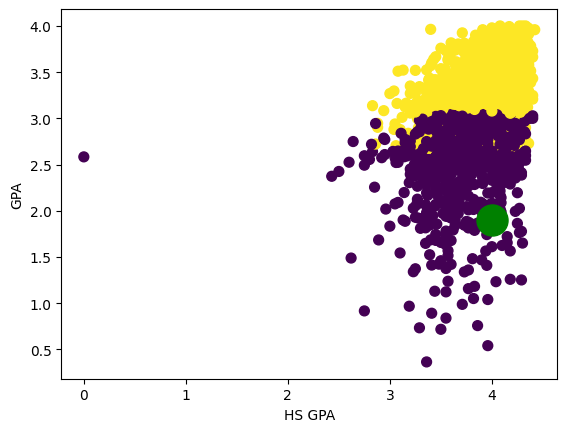

El Segundo individuo SI se va a graduar en 4 años:  [0]




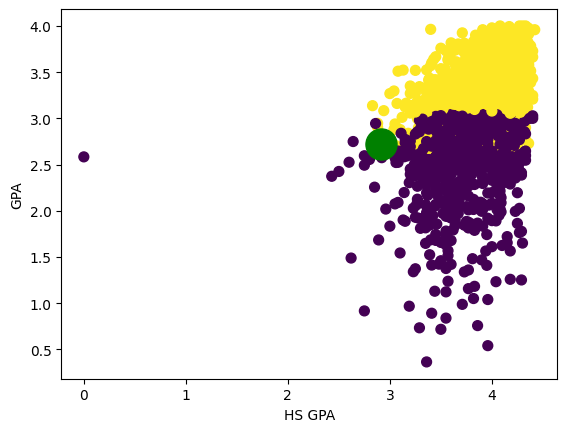

El Tercer individuo SI se va a graduar en 4 años:  [1]




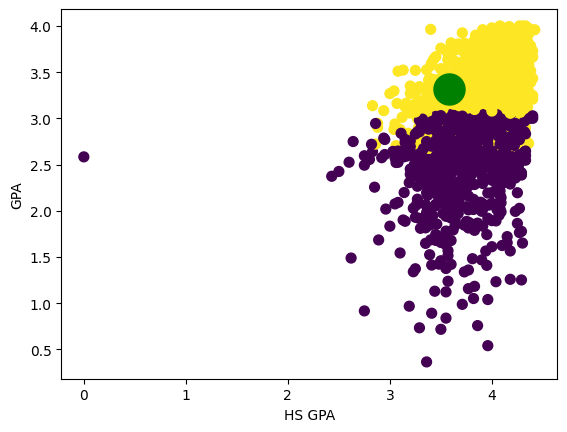

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


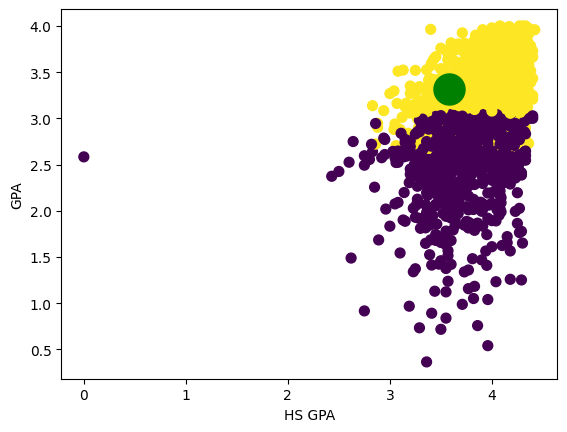




El primer  individuo de la base de datos está en el cluster:  [3]

El segundo individuo de la base de datos está en el cluster:  [0]

El tercer individuo de la base de datos está en el cluster:  [1]


In [ ]:
#Modelo, ¿Una persona con estas características: "" se va a graduar en 4 años o no?
XDP2=np.array([(1,4,1260,1.9,1)])
ydpp2=mkn.predict(XDP2)
print("El Primer individuo SI se va a graduar en 4 años: ",ydpp2)
print()
print()

#Las variables siempre se hacen con las variables que tienen más correlación
plt.scatter(XD[:,1],XD[:,3],c=Yd,s=50,cmap='viridis') # Changed XD2 to XD
plt.scatter(XDP2[:,1],XDP2[:,3],marker='o',s=500,facecolors='green')
plt.xlabel('HS GPA'); plt.ylabel('GPA')
plt.show()


#Modelo, ¿Una persona con estas características: "" se va a graduar en 4 años o no?
XDP2=np.array([(1,2.91,1090,2.719,1)])
ydpp2=mkn.predict(XDP2)
print("El Segundo individuo SI se va a graduar en 4 años: ",ydpp2)
print()
print()

#Las variables siempre se hacen con las variables que tienen más correlación
plt.scatter(XD[:,1],XD[:,3],c=Yd,s=50,cmap='viridis') # Changed XD2 to XD
plt.scatter(XDP2[:,1],XDP2[:,3],marker='o',s=500,facecolors='green')
plt.xlabel('HS GPA'); plt.ylabel('GPA')
plt.show()


#Modelo, ¿Una persona con estas características: "" se va a graduar en 4 años o no?
XDP2=np.array([(0,3.58,1210,3.319, 1)])
ydpp2=mkn.predict(XDP2) # Changed mknn to mkn
print("El Tercer individuo SI se va a graduar en 4 años: ",ydpp2)
print()
print()

#Las variables siempre se hacen con las variables que tienen más correlación
plt.scatter(XD[:,1],XD[:,3],c=Yd,s=50,cmap='viridis') # Changed XD2 to XD
plt.scatter(XDP2[:,1],XDP2[:,3],marker='o',s=500,facecolors='green')
plt.xlabel('HS GPA'); plt.ylabel('GPA')
plt.show()


print()
print()

np.random.seed(42) #Para que nos de el mismo modelo a todos


mkm=KMeans(n_clusters=5,init='random',random_state=42) #Relación (matriz de confusión) entre yd que son los datos originales de PreApr y ydp2 que son los datos pronosticados por el modelo
mkm.fit(XD,Yd) # Changed XD2 to XD and yd2 to Yd
labels=mkm.labels_ #Dónde quedaron clasificados cada uno de los solicitantes de créditos
print()


#Se mapean los clusters - ¿Cómo quedaron clasificados los solicitantes?
plt.figure()
plt.scatter(XD[:,1],XD[:,3],c=Yd,s=50,cmap='viridis') # Changed XD2 to XD
plt.scatter(XDP2[:,1],XDP2[:,3],marker='o',s=500,facecolors='green') #para saber visualmente yo en dónde quedaría
plt.xlabel('HS GPA'); plt.ylabel('GPA')
plt.show()
print()
print()
print()


#¿Dónde quedó el primer individuo?
XDP2=np.array([(1,4,1260,1.9,1)])
ydpp2=mkm.predict(XDP2)
print("El primer  individuo de la base de datos está en el cluster: ",ydpp2)
print()

#¿Dónde quedó el segundo individuo?
XDP2=np.array([(1,2.91,1090,2.719,1)])
ydpp2=mkm.predict(XDP2)
print("El segundo individuo de la base de datos está en el cluster: ",ydpp2)
print()

#¿Dónde quedó el tercer individuo?
XDP2=np.array([(0,3.58,1210,3.319, 1)])
ydpp2=mkm.predict(XDP2)
print("El tercer individuo de la base de datos está en el cluster: ",ydpp2)

**Analisis de resultados**

**Caracterización de las variables aleatorias**

- ¿Determinar cuales son las variables que tienen una mayor correlación entre ellas, teniendo en cuenta para este análisis la variable de pronóstico o variable de salida ‘Grad’?
- ¿Cuáles son las dos variables que tienen mayor correlación frente a la  graficación de los datos?

**Modelo Naive Bayes**

- ¿Cuál es el grupo de clasificación que logró la mayor calificación en la preparatoria (HS GPA) y el promedio de la Universidad (GPA)?
- ¿De acuerdo con los índices de exactitud, sensibilidad y especificidad, determinar como fue el comportamiento del modelo?
- ¿Determinar la categoría a la cual pertenecen cada uno de los individuos de pronóstico (Hoja 2)?

Es posible evidenciar que en la base de datos hay 2000 datos.

El porcentaje de las personas que SI van a lograr su grado en 4 años es de: 0.692
El porcentaje de las personas que NO van a lograr su grado en 4 años es de: 0.308

La exactitud del modelo es: 0.867 o 86.7%

La tasa de error es: 0.133 o 13.3%

La sensibilidad es: 0.9263005780346821 o 92.6%

La especificidad es: 0.8158844765342961 o 81.5%

La precisión es 0.9263005780346821 o 92.6%

La probabilidad de negativo es 0.7337662337662337 o 73.3%

Esto nos indica que el modelo es mejor clasificando positivos, o sea los que si se van a graduar.

Cada uno de los individuos pertenecen

**Modelo Decision Tree**

- ¿Cuál fue el comportamiento que tuvo el modelo frente a los índices de exactitud, sensibilidad y especificidad, y comparar este comportamiento con el modelo Naive Bayes?
- ¿Indicar las reglas del negocio que definen los nodos puros?
- Determinar las reglas a las que pertenecen los individuos de pronóstico (Hoja 2).

Es posible evidenciar la matriz de confusion: [[ 422  194]
 [   2 1382]]
La exactitud alcanzada por el modelo es: 0.902 o 90%
La sensibilidad alcanzada por el modelo es: 0.9985549132947977 o 99%
La especificidad alcanzada por el modelo es: 0.685064935064935 o 68%
Evidenciando un comportamiento que favorece a los positivos o mejor dicho los que se van a graduar.

**Modelo de Agrupamiento KMeans**

- Determinar los clusters que lograron la mayor calificación en la preparatoria (HS GPA) y el promedio de la calificación en la Universidad (GPA)
- Compara el coeficiente de Exactitud, Sensibilidad y Especificidad alcanzado por este modelo y comparar su desempeño con los demás modelos.
- Cuál es el clúster que posee la mayor cantidad de personas que van a graduarse e indicar el porcentaje de graduación.
- Determinar el clúster al que pertenecen cada uno de los estudiantes que hacen parte de la hoja de pronóstico.

La exactitud es: 0.8505 o 85%
La sensibilidad es: 0.9501445086705202 o 95%
La especificidad es: 0.6266233766233766 o 62%

Se puede evidenciar que es un modelo que tambien favorece a los positivos.
